In [326]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from collections import Counter
from imblearn.over_sampling import SMOTE
import warnings
warnings.filterwarnings("ignore")
from xgboost import XGBClassifier

In [353]:
df = pd.read_csv('https://raw.githubusercontent.com/dphi-official/Datasets/master/connect-4/train_set_label.csv')

In [354]:
df.head()

,a1,a2,a3,a4,a5,a6,b1,b2,b3,b4,...,f4,f5,f6,g1,g2,g3,g4,g5,g6,class
0,b,b,b,b,b,b,o,o,x,b,...,b,b,b,b,b,b,b,b,b,loss
1,b,b,b,b,b,b,o,b,b,b,...,b,b,b,b,b,b,b,b,b,loss
2,x,x,o,b,b,b,o,b,b,b,...,b,b,b,b,b,b,b,b,b,win
3,x,x,b,b,b,b,o,b,b,b,...,b,b,b,o,x,o,x,b,b,win
4,x,x,o,o,b,b,o,b,b,b,...,b,b,b,b,b,b,b,b,b,win


# EDA

We will check for any null values in the dataset.

In [378]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50667 entries, 0 to 50666
Data columns (total 43 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   a1      50667 non-null  object
 1   a2      50667 non-null  object
 2   a3      50667 non-null  object
 3   a4      50667 non-null  object
 4   a5      50667 non-null  object
 5   a6      50667 non-null  object
 6   b1      50667 non-null  object
 7   b2      50667 non-null  object
 8   b3      50667 non-null  object
 9   b4      50667 non-null  object
 10  b5      50667 non-null  object
 11  b6      50667 non-null  object
 12  c1      50667 non-null  object
 13  c2      50667 non-null  object
 14  c3      50667 non-null  object
 15  c4      50667 non-null  object
 16  c5      50667 non-null  object
 17  c6      50667 non-null  object
 18  d1      50667 non-null  object
 19  d2      50667 non-null  object
 20  d3      50667 non-null  object
 21  d4      50667 non-null  object
 22  d5      50667 non-null

## Plotting the different classes in the dataset

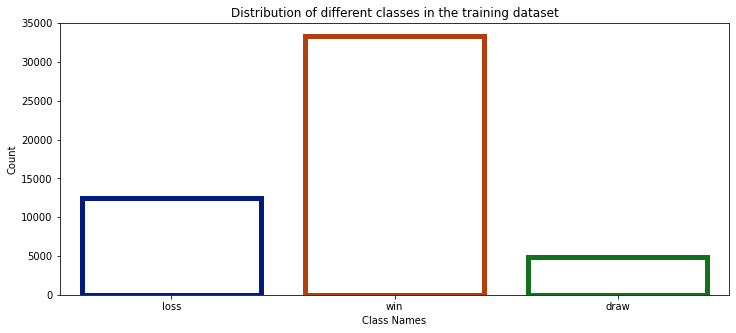

In [355]:
ax = plt.figure(figsize=(12,5))
sns.countplot(x = 'class', data = df, facecolor=(0, 0, 0, 0),
                   linewidth=5,
                   edgecolor=sns.color_palette("dark", 3))
plt.xlabel('Class Names')
plt.ylabel('Count')
plt.title('Distribution of different classes in the training dataset')
plt.show()

In [356]:
counter = df['class'].value_counts()
for k,v in counter.items():
    per = v / len(df['class']) * 100
    print('Class=%s, n=%d (%.3f%%)' % (k, v, per))

Class=win, n=33354 (65.830%)
Class=loss, n=12476 (24.624%)
Class=draw, n=4837 (9.547%)


### We see here that the 'Win' class has significantly more instances as compared to 'Loss' and 'Draw'. This is going to have some adverse effect on our training as the model is gonna favour the 'Win' instance more, hence a biased outcome.

### To tackle this issue of imbalanced classification, we're gonna use Synthetic Minority Oversampling Technique (SMOTE) which we will later discuss.

In [358]:
#Label Encoding

In [359]:
le = LabelEncoder()

In [360]:
df['class'] = le.fit_transform(df['class'])

In [361]:
df.head()

,a1,a2,a3,a4,a5,a6,b1,b2,b3,b4,...,f4,f5,f6,g1,g2,g3,g4,g5,g6,class
0,b,b,b,b,b,b,o,o,x,b,...,b,b,b,b,b,b,b,b,b,1
1,b,b,b,b,b,b,o,b,b,b,...,b,b,b,b,b,b,b,b,b,1
2,x,x,o,b,b,b,o,b,b,b,...,b,b,b,b,b,b,b,b,b,2
3,x,x,b,b,b,b,o,b,b,b,...,b,b,b,o,x,o,x,b,b,2
4,x,x,o,o,b,b,o,b,b,b,...,b,b,b,b,b,b,b,b,b,2


In [362]:
le_class = dict(zip(le.classes_, le.transform(le.classes_)))
print("Sklearn label encoder results for different classes:") 
print(le_class)

Sklearn label encoder results for different classes:
{'draw': 0, 'loss': 1, 'win': 2}


In [363]:
X = df.drop('class', axis = 1)
y = df['class']

In [364]:
#one-hot encoding the features
X = pd.get_dummies(X)

# What is SMOTE?

#### SMOTE is an over-sampling method which means it adds more samples from under-represented classes. So basically it creates synthetic samples of the minority class. 

In [366]:
oversample = SMOTE()

In [367]:
X, y = oversample.fit_resample(X, y)

Class=1, n=33354 (33.333%)
Class=2, n=33354 (33.333%)
Class=0, n=33354 (33.333%)


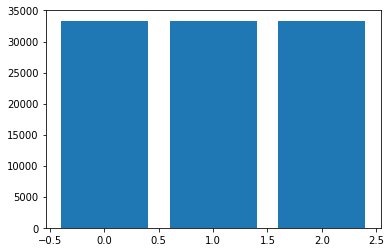

In [368]:
counter = Counter(y)
for k,v in counter.items():
    per = v / len(y) * 100
    print('Class=%d, n=%d (%.3f%%)' % (k, v, per))
# plot the distribution
plt.bar(counter.keys(), counter.values())
plt.show()

We see above that now we have equal number of samples.

In [369]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.30, random_state=42)

In [370]:
scaler = MinMaxScaler()

In [371]:
X_train = scaler.fit_transform(X_train)

In [372]:
X_val = scaler.transform(X_val)

In [373]:
X_train.shape

(70043, 126)

In [374]:
X_val.shape

(30019, 126)

Now before training our model we need to keep in mind that we are dealing with imbalanced class. There are some pre-requisites to training a model with imbalanced classes. One of which is Cost-sensitive learning. 

## Cost sensitive learning for multi class classification

#### Most machine learning algorithms assume that we have balanced set of classes. But like in our case, we had an imbalanced class which we balanced using SMOTE but at the end of the day, it is still synthetic data which is not that much reliable. To solve this issue, we're gonna use a learning called cost sensitive learning with which we can provide extra bias towards those classes that had fewer examples in the training dataset. 

#### The RandomForestClassifier class in scikit-learn supports cost-sensitive learning via the “class_weight” argument.

By default the class_weight hyperparamater is set to 'balanced' but we can change it by passing weights in a dictionary.

In [315]:
from sklearn.ensemble import RandomForestClassifier
weights = {0: 3.0, 1: 2.0, 2: 1.0}
model = RandomForestClassifier(n_estimators=120, class_weight = weights)
model.fit(X_train, y_train)

RandomForestClassifier(class_weight={0: 3.0, 1: 2.0, 2: 1.0}, n_estimators=200)

We know that our label encoding for our classes are:- {'draw': 0, 'loss': 1, 'win': 2}

So what we did in the above cell is, we passed a dictionary where we told the model that for 'draw'(0) take the weight 3 times that of 'win'(2) and
similarly we told the model that for 'loss'(1) take the weights 2 times that of 'win'(2) class.

In [317]:
pred = model.predict(X_val)

In [351]:
from sklearn.metrics import f1_score

In [319]:
print('Weighted F1 Score is: ', f1_score(y_val, pred, average='weighted'))

Weighted F1 Score is:  0.9362250671814507


In [284]:
test_data = pd.read_csv('https://raw.githubusercontent.com/dphi-official/Datasets/master/connect-4/test_set_label.csv')

In [285]:
test_data = pd.get_dummies(test_data)

In [286]:
test_data = scaler.transform(test_data)

In [287]:
test_data.shape

(16890, 126)

In [288]:
target = model.predict(test_data)

In [289]:
target

array([1, 2, 2, ..., 2, 2, 2])

In [290]:
target = le.inverse_transform(target)

In [291]:
target

array(['loss', 'win', 'win', ..., 'win', 'win', 'win'], dtype=object)

I got a test score of 82% which means my model has high variance and low bias (overfitting). This is a common problem with oversampling the data so be careful when you use SMOTE.

In [292]:
res = pd.DataFrame(target)
res.columns = ["prediction"]
res.to_csv("submission.csv", index = False)